## Bias-Variance-Tradeoff Demo:
This demo explores an important theory in machine learning called Bias Variance tradeoff. In machine learning setting, we have a dataset containing some input features X and an output feature Y. We assume there are some unknown relation between Y and X, suppose Y = f(X). In machine learning we try to create a mathematical model which is able to predict Y based on X.  

Now, for example, if we assume that there is a linear relationship between Y and X, Y = a + b * X, then we have introduced an error because of approximating the unknown relation between Y and X to a known linear function. This error is called 'Bias'.  

If we know the parameter values in the linear function 'a', and 'b', then for any new input value X, we can predict Y. The squared-deviations in the predictions we made are called 'Variance'.  

To approximate an unknown function between Y and X, we can create different mathematical models and each model will have its own bias due to the approximation and a variance in its predictions. Generally with higher flexibility of a model, the bias will decrease and the variance will increase.  

For a less flexible model like linear regression, the bias will be high and variance will be low, however for a highly flexible model, the bias will be low and the variance will be high.


In [627]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import make_interp_spline
import random

In [628]:
# create_data - the function is used to generate data - arguments: N: number of data points, w: weights
def create_data(N, w):
  X = np.random.rand(N, 1) * 5
  errors = np.random.randn(N, 1) * 50
  y = (w[0] + w[1] * X + w[2] * (X ** 2) + w[3] * (X ** 3) + w[4] * (X ** 4)) + np.sin(2 * np.pi * X) * 200 + errors
  return (X, y)

# split_data - the function is used to split data into training and test set - arguments: X: input, y: output, test_size: number of data points in test dataset
def split_data(X, y, test_size):
  X_indices = np.arange(0, len(X))
  test_indices = random.sample(X_indices.tolist(), test_size)
  train_indices = [index for index in X_indices if index not in test_indices]

  X_test = np.array([X[index] for index in test_indices])
  y_test = np.array([y[index] for index in test_indices])
  X_train = np.array([X[index] for index in train_indices])
  y_train = np.array([y[index] for index in train_indices])

  return (X_train, y_train, X_test, y_test)

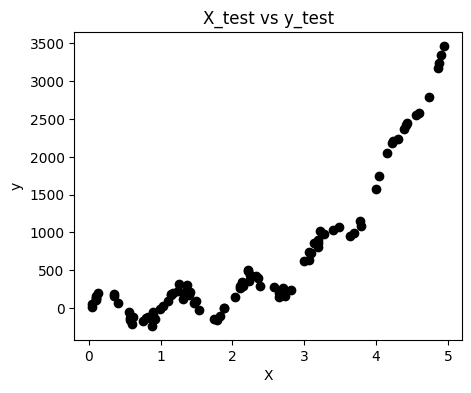

In [624]:
# 100 test data points are created and plotted
n_test = 100
w = (10, 2,3,4,5)
x_test, y_test = create_data(n_test,w)
plt.figure(figsize=(5,4))
plt.scatter(x_test, y_test, c='black')
plt.xlabel("X")
plt.ylabel("y")
plt.title("X_test vs y_test")
plt.show()

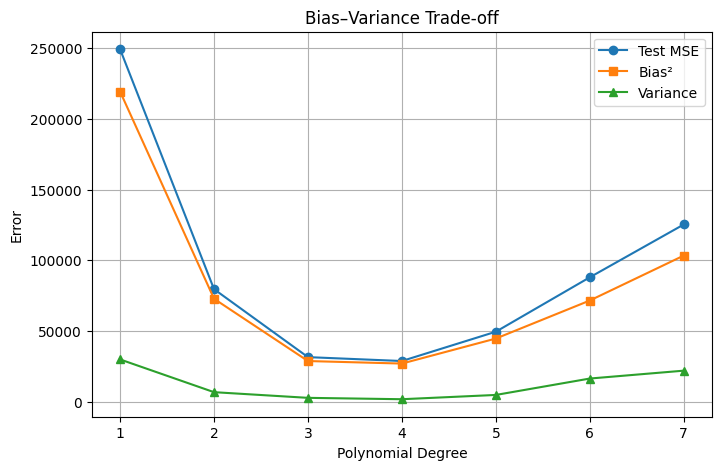

In [625]:
# For each polynomial degree, 50 datasets are generated, each dataset has 25 training data,
# a regression model is trained with the polynomial degree and tested and it predicts and calculates coefficient of determination,
# for each degree bias^2, variance and MSE is calculated and plotted
degrees = range(1, 8)
n_datasets = 50
n_train = 25

mse_list = []
bias2_list = []
var_list = []
test_score_list = []

for degree in degrees:
    predictions = []
    test_scores = []

    for _ in range(n_datasets):
        x_train, y_train = create_data(n_train,w)

        model = LinearRegression()
        model.fit(x_train ** degree, y_train)
        y_pred = model.predict(x_test ** degree)
        test_score = model.score(x_test ** degree, y_test)
        predictions.append(y_pred)
        test_scores.append(test_score)

    predictions = np.array(predictions)
    test_score_list.append(np.mean(np.array(test_scores)))

    mean_pred = np.mean(predictions, axis=0)
    bias2 = np.mean((mean_pred - y_test)**2)
    variance = np.mean(np.var(predictions, axis=0))
    mse = bias2 + variance

    bias2_list.append(bias2)
    var_list.append(variance)
    mse_list.append(mse)

plt.figure(figsize=(8, 5))
plt.plot(degrees, mse_list, 'o-', label='Test MSE')
plt.plot(degrees, bias2_list, 's-', label='Bias²')
plt.plot(degrees, var_list, '^-', label='Variance')
plt.xlabel("Polynomial Degree")
plt.ylabel("Error")
plt.title("Bias–Variance Trade-off")
plt.legend()
plt.grid(True)
plt.show()

### Comments:
1. Bias has reduced from polynomial degree 1 to 4, and then it starts to increase.  
2. Variance reduces slightly from degree 1 to 4, then it starts to increase  
3. MSE follows the bias pattern
4. This shows the models are able to capture the true form of the response y at degree 4. However from degree 4 overfitting starts, because of which bias again starts to increase
5. However, the models are too simple because of which variance of the predictions are not much resulting in low test variance compared to bias

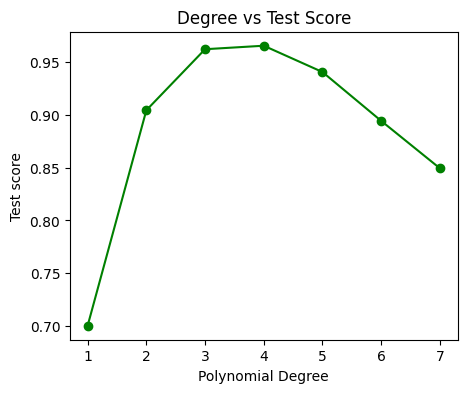

In [626]:
# plotting model scores for different polynomial degrees
plt.figure(figsize=(5, 4))
plt.plot(degrees, test_score_list, 'o-', c='green')
plt.xlabel("Polynomial Degree")
plt.ylabel("Test score")
plt.title("Degree vs Test Score")
plt.show()

### Comment:  
The plot Polynomial Degree vs Test Score shows the coefficient of determination increases from degree 1 to 4, and from degree 4 it starts to decrease due to overfitting